In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings




📊 Descriptive Statistics (Top Variables):

       TotalPremium   TotalClaims  CustomValueEstimate
count  1.000098e+06  1.000098e+06         2.204560e+05
mean   6.190550e+01  6.486119e+01         2.255311e+05
std    2.302845e+02  2.384075e+03         5.645157e+05
min   -7.825768e+02 -1.200241e+04         2.000000e+04
25%    0.000000e+00  0.000000e+00         1.350000e+05
50%    2.178333e+00  0.000000e+00         2.200000e+05
75%    2.192982e+01  0.000000e+00         2.800000e+05
max    6.528260e+04  3.930921e+05         2.655000e+07
Coefficient of Variation for TotalPremium: 3.72
Coefficient of Variation for TotalClaims: 36.76

🧾 Data Types Overview:

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType     

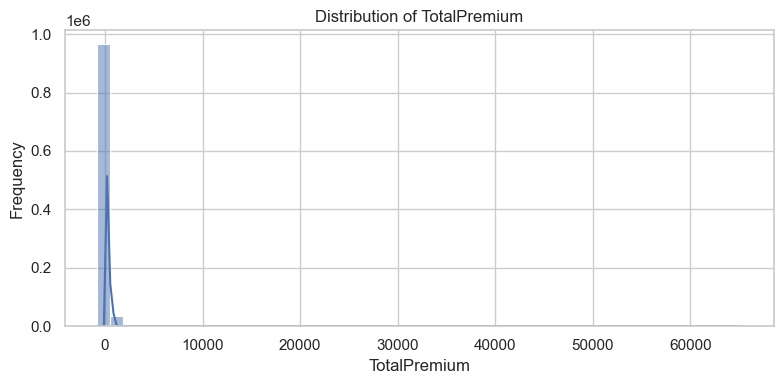

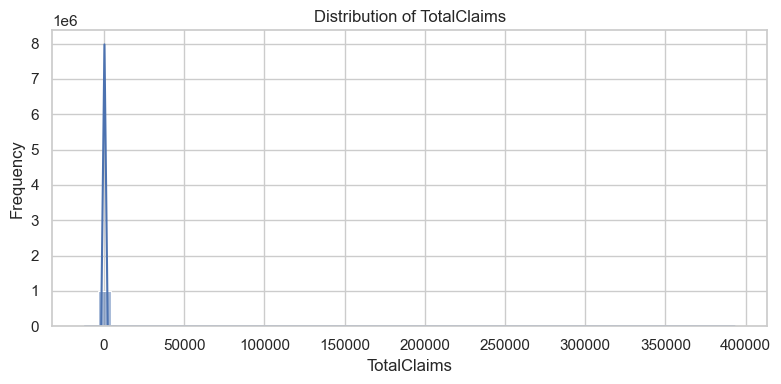

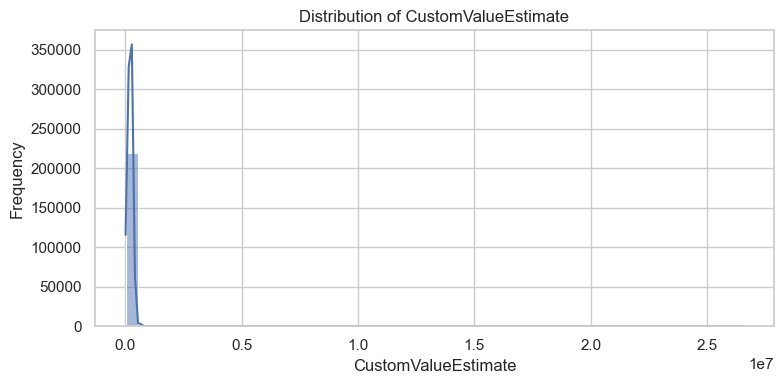

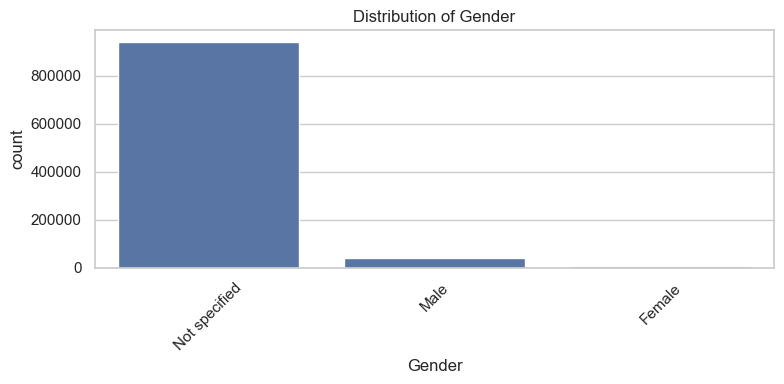

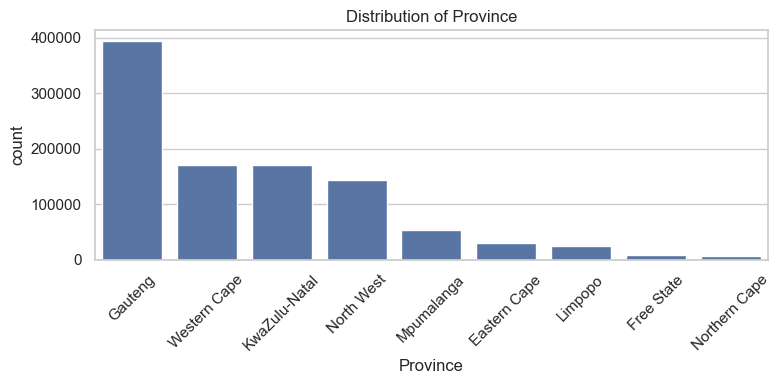

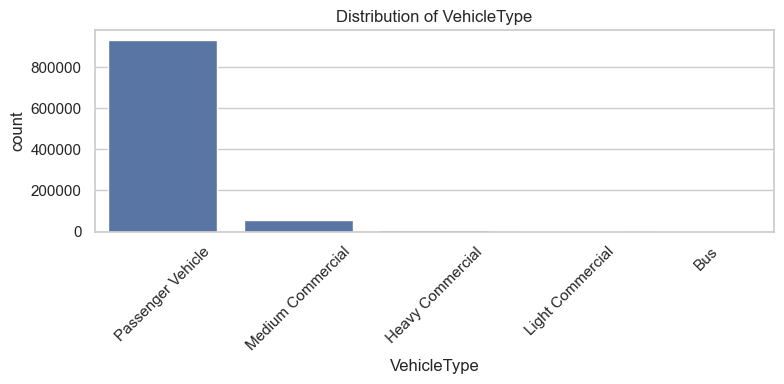

TypeError: Invalid object type at position 0

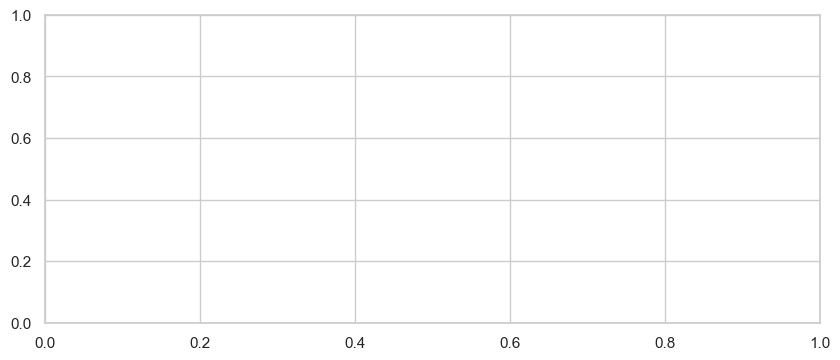

In [18]:
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# ============ Load Data ============

df = pd.read_csv("../data/MachineLearningRating_v3.txt", delimiter='|')  # adjust delimiter if needed


# ============ Data Summarization ============
print("\n📊 Descriptive Statistics (Top Variables):\n")
print(df[["TotalPremium", "TotalClaims", "CustomValueEstimate"]].describe())

# Variability / Coefficient of Variation
def coef_var(x):
    return np.std(x) / np.mean(x)

for col in ["TotalPremium", "TotalClaims"]:
    cv = coef_var(df[col].dropna())
    print(f"Coefficient of Variation for {col}: {cv:.2f}")

# ============ Data Structure ============
print("\n🧾 Data Types Overview:\n")
print(df.dtypes)

# Convert dates
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors="coerce")

# ============ Data Quality Assessment ============
print("\n🔍 Missing Values (%):\n")
missing_ratio = df.isnull().mean() * 100
print(missing_ratio[missing_ratio > 0].sort_values(ascending=False))

# ============ Univariate Analysis ============

num_cols = ["TotalPremium", "TotalClaims", "CustomValueEstimate"]

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

cat_cols = ["Gender", "Province", "VehicleType"]

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ============ Bivariate/Multivariate Analysis ============
df["Month"] = df["TransactionMonth"].dt.to_period("M")
grouped_monthly = df.groupby("Month")[["TotalPremium", "TotalClaims"]].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=grouped_monthly, x="Month", y="TotalPremium", label="Premium")
sns.lineplot(data=grouped_monthly, x="Month", y="TotalClaims", label="Claims")
plt.title("Monthly Premium vs Claims Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(
    df[["TotalPremium", "TotalClaims", "CustomValueEstimate"]].corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title("Correlation Between Financial Variables")
plt.tight_layout()
plt.show()

# ============ Data Comparison Over Geography ============
plt.figure(figsize=(10, 4))
province_group = df.groupby("Province")[["TotalPremium", "TotalClaims"]].sum()
province_group.plot(kind="bar", stacked=True, title="Total Premium and Claims by Province")
plt.tight_layout()
plt.show()

# ============ Outlier Detection ============
for col in ["TotalPremium", "TotalClaims"]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection: {col}")
    plt.tight_layout()
    plt.show()
